In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #d
!pip install -q findspark 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #funciones dels sistema de python para cambiar variables de entorno y que funcione
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark #tenemos que generar un contexto spark para trabajar
findspark.init()
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() 



Germán de los Mozos Romero
09/12/2020

El objetivo es realizar un histograma con SPARK de la variable puntos de visitante.

Caerga de ficheros RDD

In [13]:
import pandas as pd



In [5]:
nba = sc.textFile("partidosLigaNBA.csv")

### Eliminamos la cabecera

In [6]:
cabecera_nba = nba.take(1)[0] #cogemos la primer fila
f_nba = nba.filter(lambda x: x != cabecera_nba) #funcion con la que filtramos no coger la cabecera
f_nba.take(3)#take para que la función se ejecute

['Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106']


### Lo siguiente es separar los elementos de cada uno de las columnas, que ahora mismo se encuentran separados por ":"

In [7]:
f_nba=f_nba.map(lambda x: x.split(":"))
f_nba.take(3)

[['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Utah Jazz',
  '117',
  'Golden State Warriors',
  '96'],
 ['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Houston Rockets',
  '95',
  'Los Angeles Lakers',
  '93'],
 ['Tue, Oct 30, 2007',
  '"7',
  '00 pm"',
  'Portland Trail Blazers',
  '97',
  'San Antonio Spurs',
  '106']]

Con que lo que nos interesa es coger el último valor de la lista, hacemos otra función y los pasamos a número para poder graficarlos.

In [8]:
f_nba=f_nba.map(lambda x: x[-1])
f_nba.take(3)

['96', '93', '106']

In [9]:
#filtramos por aquellos que son digitos
f_nba=f_nba.filter(lambda x_int: x_int.isdigit())
f_nba=f_nba.map(lambda x: int(x))
f_nba.take(30)

[96,
 93,
 106,
 74,
 120,
 119,
 101,
 112,
 104,
 102,
 106,
 80,
 99,
 95,
 101,
 103,
 102,
 85,
 110,
 87,
 120,
 91,
 69,
 113,
 92,
 98,
 96,
 123,
 89,
 111]

Hacemos la función del intervalo

In [10]:

def intervalo(x):
  
  if x<75:
    return 'intervalo1'
  elif x <83:
    return 'intervalo'
  elif x<94:
    return 'intervalo'
  elif x<105:
    return 'intervalo 4'
  elif x<115:
    return 'intervalo 5'
  elif x<128:
    return 'intervalo 6'
  elif x<143:
    return 'intervalo7'
  elif x<152:
    return 'intervalo 8'
  elif x<=168:
    return 'intervalo 10'




Aplicamos la función y vemos todo lo hecho anteriormente

In [11]:
f_nba_intervalo = nba.filter(lambda y: y!= cabecera_nba) \
                      .map(lambda y: y.split(":")[-1]) \
                      .filter(lambda y_int: y_int.isdigit()) \
                      .map(lambda y: int(y)) \
                      .map(lambda x : (intervalo(x),1)) \
                      .reduceByKey(lambda a, b: a + b) \
                      .collect()


In [12]:
f_nba_intervalo #vemos como están distribuidos los intervalos

[('intervalo 4', 4491),
 ('intervalo 5', 3201),
 ('intervalo1', 134),
 ('intervalo 6', 1649),
 ('intervalo7', 279),
 ('intervalo 10', 2),
 ('intervalo', 3127),
 ('intervalo 8', 14)]

Hacemos el histograma

([<matplotlib.axis.YTick at 0x7f5da44bd160>,
 <a list of 8 Text major ticklabel objects>)

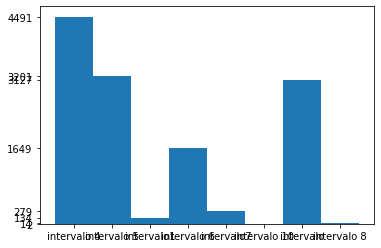

In [ ]:
Intervalos, y = zip(*f_nba_intervalo)
x = np.arange(len(Intervalos)) 
width = 1
plt.bar(x, y, width, align='center')

plt.xticks(x, Intervalos) 
plt.yticks(y)

